In [1]:
import numpy as np
import pandas as pd
import scipy.constants as cst
import scipy.special as spc
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')
from scipy.optimize import fsolve
%matplotlib inline

In [16]:
lamda = 1064*10**(-9) #wavelength in nm
k_lamda=2*np.pi/lamda
m_Rb=1.44316*10**(-25) #in kg
Er=(cst.hbar*k_lamda)**2/(2*m_Rb)/cst.h/10**3 #in kHz
c=cst.physical_constants['speed of light in vacuum'][0]
tau_D1=2*np.pi*5.746*10**6
tau_D2=2*np.pi*6.065*10**6
Omaga_D1=2*np.pi*c/(794.9788509*10**-9)
Omaga_D2=2*np.pi*c/(780.241209686*10**-9)
m_Rb*cst.g/cst.h/Er/1000
Er,(cst.hbar*2*np.pi/(2*630*10**(-9)))**2/(2*m_Rb)/cst.h/10**3

(2.027814796121164, 1.4460071928883753)

In [3]:
cst.hbar*np.pi*10**9/630/m_Rb*10**3

3.6439381260787065

In [4]:
def potfactor(lamda,polar=0,mf=-1,gf=-0.5):
    tmp1=-(2+polar*mf*gf)*tau_D2*np.pi*c**2/(2*Omaga_D2**3)*(1/(-2*np.pi*c/lamda+Omaga_D2)+1/(2*np.pi*c/lamda+Omaga_D2))
    tmp2=-(1-polar*mf*gf)*tau_D1*np.pi*c**2/(2*Omaga_D1**3)*(1/(-2*np.pi*c/lamda+Omaga_D1)+1/(2*np.pi*c/lamda+Omaga_D1))
    return (1*tmp1+1*tmp2)/cst.h

def R(w0,z,lamda):
    zR=np.pi*w0**2/lamda
    return w0*np.sqrt(1+(z/zR)**2)

def wz(w0,z,lamda):
    zR=np.pi*w0**2/lamda
    return w0*np.sqrt(1+(z/zR)**2)

# def Egauss1(e0, w0,lamda, r, z):
#     s1,s2=np.meshgrid(r,z)
#     #print(s1,s2)
#     tmp=0.5*(s1**2)*np.abs(s2)/(s2**2+(np.pi*w0**2/lamda)**2)
#     #print(-(s1**2)/(wz(w0,s2,lamda)**2))
#     s=e0*w0/wz(w0,s2,lamda)*np.exp(-(s1**2)/(wz(w0,s2,lamda)**2)-2j*np.pi/lamda*(s2+tmp)+1j*np.arctan(s2*lamda/(np.pi*w0**2)))
#     return s

def Egauss(P, w1,w2,lamda, x,y, z):
    e0=(2*P/(np.pi*w1*w2))**0.5
    #print(s1,s2)
    if z!=0:
        r1=(z*(1+(np.pi*w1**2/lamda/z)**2))**(-1)
        r2=(z*(1+(np.pi*w2**2/lamda/z)**2))**(-1)
    else:
        r1=0
        r2=0
    #print(-(s1**2)/(wz(w0,s2,lamda)**2))
    s=e0*((w1/wz(w1,z,lamda))*(w2/wz(w2,z,lamda)))**0.5*\
    np.exp(-(x**2)/(wz(w1,z,lamda)**2)-(y**2)/(wz(w2,z,lamda)**2))\
    *np.exp(0.5j*(np.arctan(z*lamda/(np.pi*w1**2))+np.arctan(z*lamda/(np.pi*w2**2))))\
    *np.exp(-1j*2*np.pi/lamda/2*(x**2*r1+y**2*r2)-1j*2*np.pi/lamda*z)
    return s

def latticepotential(P, w0,lamda, r, z):
#     tmp=np.sqrt(2*P/(np.pi*w0**2))
    Etotal=Egauss(P, w0,w0,lamda, 0,r, z)+Egauss(P, w0,w0,lamda, 0,r, -z)
    return -potfactor(lamda)*np.abs(Etotal)**2/Er/1000

def trappotential(P, w0,lamda, r, z,polar=0,mf=-1,gf=-0.5):
    #s1,s2=np.meshgrid(r,z)
    tmp=np.sqrt(2*P/(np.pi*w0**2))
    Etotal=Egauss(tmp, w0,lamda, r, z)
    return -potfactor(lamda,polar=polar,mf=mf,gf=gf)*np.abs(Etotal)**2/Er/1000


def latticedepth(P, w0,lamda):
    return (-latticepotential(P, w0,lamda, 0, 0)+latticepotential(P, w0,lamda, 0, 0.25*lamda))

array([7.87567797e-07])

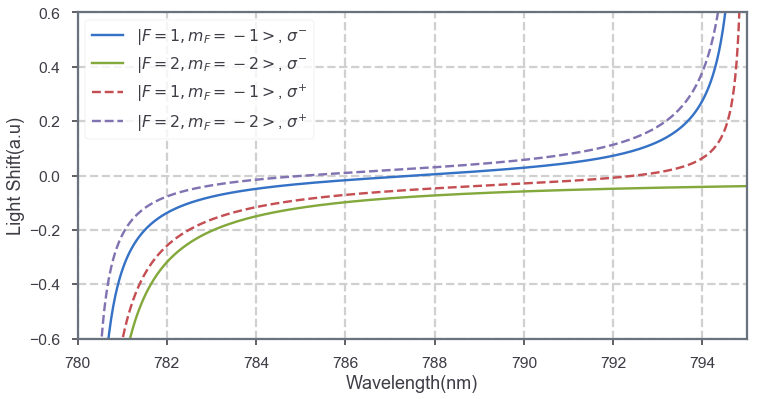

In [5]:
lamlist=np.linspace(780.45*10**-9,794.95*10**-9,1000)
plt.figure(figsize=(12,6))
plt.xlabel('Wavelength(nm)')
plt.ylabel('Light Shift(a.u)')
plt.xlim(780,795)
plt.ylim(-0.6,0.6)
plt.plot(lamlist*10**9,potfactor(lamlist,polar=-1,mf=-1,gf=-0.5),label='$|F=1,m_{F}=-1>$, $\sigma^{-}$')
plt.plot(lamlist*10**9,potfactor(lamlist,polar=-1,mf=-2,gf=0.5),label='$|F=2,m_{F}=-2>$, $\sigma^{-}$')
plt.plot(lamlist*10**9,potfactor(lamlist,polar=1,mf=-1,gf=-0.5),'--',label='$|F=1,m_{F}=-1>$, $\sigma^{+}$')
plt.plot(lamlist*10**9,potfactor(lamlist,polar=1,mf=-2,gf=0.5),'--',label='$|F=2,m_{F}=-2>$, $\sigma^{+}$')
plt.legend()
#plt.show()
fsolve(potfactor,787.65*10**-9,args=(-1,-1,-0.5))

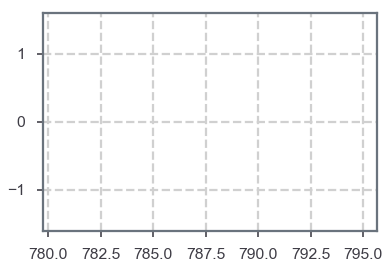

In [6]:
plt.ylim(-1.6,1.6)
plt.plot(lamlist*10**9,10**34*potfactor(lamlist,polar=1,mf=-2,gf=0.5)-10**34*potfactor(lamlist,polar=1,mf=-1,gf=-0.5),'--',label='$|F=2,m_{F}=-2>$, $\sigma^{+}$')

In [7]:
70/((trappotential(1, 0.6*10**-6,7.87567797e-07, 0, 0,polar=-1,mf=-2,gf=0.5)*Er-1*trappotential(1, 0.6*10**-6,7.87567797e-07, 0, 0,polar=-1,mf=-1,gf=-0.5)*Er)[0])
# plt.ylim(0,0.0002*10**7)
# plt.xlim(785,790)
# plt.plot(lamlist*10**9,[(trappotential(1, 0.6*10**-6,lamd, 0, 0,polar=-1,mf=-2,gf=0.5)*Er
#                    -1*trappotential(1, 0.6*10**-6,lamd, 0, 0,polar=-1,mf=-1,gf=-0.5)*Er)[0] for lamd in lamlist])

TypeError: Egauss() missing 2 required positional arguments: 'y' and 'z'

## Dimple Trap

In [25]:
dimplewaist=11*10**-6
dimplepowerunit=0.0005 
dimplepower=3*dimplepowerunit #in unit of W ,1V equals 0.5mW
dimplelamda=850*10**-9

print('When waist is %0.2f um, power is %0.2f mW, dimple trap depth is %0.2f Er'
      %(dimplewaist*10**6,dimplepower*10**3,trappotential(dimplepower, dimplewaist,dimplelamda, [0], [0])[0,0]))

TypeError: Egauss() missing 2 required positional arguments: 'y' and 'z'

In [26]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(-33,33,500),\
         [-trappotential(dimplepower, dimplewaist,dimplelamda, x*10**-6, [0])[0,:]
         +1.3*m_Rb*cst.g/cst.h/Er/1000*x*10**-6 for x in np.linspace(-33,33,500)])

TypeError: Egauss() missing 2 required positional arguments: 'y' and 'z'

## Z Lattice Depth

In [10]:
zlatticewaist=100.*10**-6
zlatticepowerunit=0.020 
zlatticepower=5*zlatticepowerunit*0.80 #in unit of W ,1V equals 0.5mW
zlatticelamda=1064*10**-9

print('When waist is %0.2f um, power is %0.2f mW, Z lattice trap depth is %0.2f Er'
      %(zlatticewaist*10**6,zlatticepower*10**3,-latticedepth(zlatticepower, zlatticewaist,zlatticelamda)))

When waist is 100.00 um, power is 80.00 mW, Z lattice trap depth is 31.88 Er


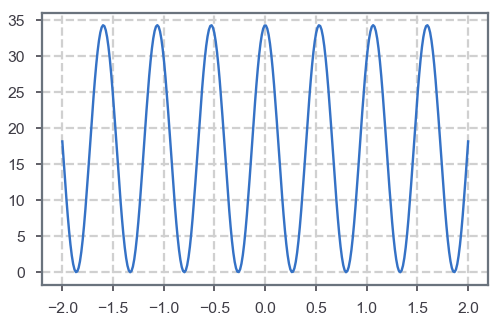

In [9]:
plt.figure(figsize=(8,5))
#plt.ylim((-33.,-30))
plt.plot(np.linspace(-2,2,300),
         [latticepotential(zlatticepower, zlatticewaist,zlatticelamda, 0,z*10**-6)+\
          0*latticepotential(zlatticepower, zlatticewaist,zlatticelamda, 0,z*10**-6) for z in np.linspace(-2,2,300)])

## X,Y lattice depth

In [60]:
xlatticewaist=90.*10**-6
xlatticepowerunit=0.020 
xlatticepower=8*zlatticepowerunit*0.8 #in unit of W ,1V equals 0.5mW
xlatticelamda=1064*10**-9

print('When waist is %0.2f um, power is %0.2f mW, X lattice trap depth is %0.2f Er'
      %(xlatticewaist*10**6,xlatticepower*10**3,latticedepth(xlatticepower, xlatticewaist,xlatticelamda)))

When waist is 90.00 um, power is 128.00 mW, X lattice trap depth is -62.97 Er


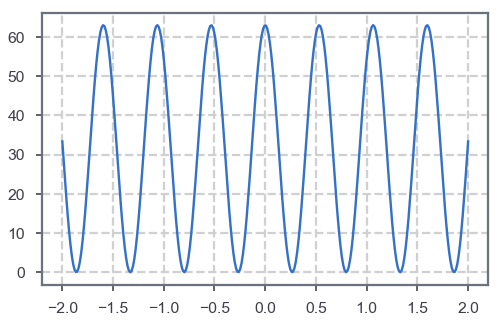

In [61]:
plt.figure(figsize=(8,5))
#plt.ylim((-33.,-30))
plt.plot(np.linspace(-2,2,300),
         [latticepotential(xlatticepower, xlatticewaist,xlatticelamda, 0,z*10**-6) for z in np.linspace(-2,2,300)])

# Spin-dependent lattice

In [17]:
lambdashort=532*10**-9
kshort=2*np.pi/lambdashort
lambdalong=1064*10**-9
klong=2*np.pi/lambdalong
kangle=50*np.pi/180
tiltangle=-0*np.pi/180
Er1064=(cst.hbar*2*np.pi/(1064*10**-9))**2/(2*m_Rb)/cst.h/10**3
Er1260=(cst.hbar*2*np.pi/(2*630*10**(-9)))**2/(2*m_Rb)/cst.h/10**3

#linearporangle=60*np.pi/180

def differentPolarizeCompenont(k,kangle,linearporangle,quantumaxisangle,x,y,z,P,w1,w2,lamda,mf,gf,fi=0):
    kvector1=k*np.array([[np.sin(kangle/2)*np.cos(tiltangle),np.cos(kangle/2)*np.cos(tiltangle),np.sin(tiltangle)]])
    kvector2=k*np.array([[-np.sin(kangle/2)*np.cos(tiltangle),np.cos(kangle/2)*np.cos(tiltangle),np.sin(tiltangle)]])
    porla1=np.array([[-np.sin(linearporangle)*np.cos(kangle/2)-np.cos(linearporangle)*np.sin(tiltangle)*np.sin(kangle/2),
                    np.sin(linearporangle)*np.sin(kangle/2)-np.cos(linearporangle)*np.sin(tiltangle)*np.cos(kangle/2),np.cos(linearporangle)*np.cos(tiltangle)]])
    porla2=np.array([[np.sin(linearporangle)*np.cos(kangle/2)+np.cos(linearporangle)*np.sin(tiltangle)*np.sin(kangle/2),
                    np.sin(linearporangle)*np.sin(kangle/2)-np.cos(linearporangle)*np.sin(tiltangle)*np.cos(kangle/2),np.cos(linearporangle)*np.cos(tiltangle)]])
    quantumaxisvector=np.array([[np.sin(quantumaxisangle[1])*np.sin(quantumaxisangle[0]),
                               np.sin(quantumaxisangle[1])*np.cos(quantumaxisangle[0]),np.cos(quantumaxisangle[1])]])
    
    projection1=np.dot(porla1,quantumaxisvector.transpose())[0][0]
    ortvector1=porla1-projection1*quantumaxisvector
    #print(ortvector1)
    ortvector1len=(np.dot(ortvector1,ortvector1.transpose())[0][0])**0.5
    if ortvector1len<10**-10:
        ortvector1=ortvector1
    else:
        ortvector1=ortvector1/ortvector1len
    #print(ortvector1)
    porla1trans=np.array([[ortvector1len,0,projection1]])
    projection2=np.dot(porla2,quantumaxisvector.transpose())[0][0]
    projection2ortvector=np.dot(porla2,ortvector1.transpose())[0][0]
    ortvector2=porla2-projection2*quantumaxisvector-projection2ortvector*ortvector1
    #print(ortvector2)
    ortvector2len=(np.dot(ortvector2,ortvector2.transpose())[0][0])**0.5
    if ortvector2len<10**-10:
        ortvector2=ortvector2
    else:
        ortvector2=ortvector2/ortvector2len
    #print(ortvector2)
    porla2trans=np.array([[projection2ortvector,ortvector2len,projection2]])
    
    transmatrix=np.array([[(1/2)**0.5,1j*(1/2)**0.5,0],[(1/2)**0.5,-1j*(1/2)**0.5,0],[0,0,1]]).transpose()
    porla1transfinal=np.dot(porla1trans,transmatrix)
    porla2transfinal=np.dot(porla2trans,transmatrix)
    position=np.array([[x,y,z]])
    z1=np.dot(position,kvector1.transpose())/k
    z2=np.dot(position,kvector2.transpose())/k
    y1=z
    y2=z
    x1=((x**2+y**2+z**2)-y1**2-z1**2)**0.5
    x2=((x**2+y**2+z**2)-y2**2-z2**2)**0.5
    total=Egauss(P, w1,w2,lamda, x1,y1, z1)*porla1transfinal*np.exp(-1j*fi)+Egauss(P, w1,w2,lamda, x2,y2, z2)*porla2transfinal
    pot=np.array([[potfactor(lamda,polar=1,mf=mf,gf=gf),potfactor(lamda,polar=-1,mf=mf,gf=gf),
                   potfactor(lamda,polar=0,mf=mf,gf=gf)]])
    energy=np.dot(np.abs(total)**2,pot.transpose())[0][0]
    #print(porla1trans,porla2trans)
    return energy/1000
    
def Egauss(P, w1,w2,lamda, x,y, z):
    e0=(2*P/(np.pi*w1*w2))**0.5
    #print(s1,s2)
    if z!=0:
        r1=(z*(1+(np.pi*w1**2/lamda/z)**2))**(-1)
        r2=(z*(1+(np.pi*w2**2/lamda/z)**2))**(-1)
    else:
        r1=0
        r2=0
    #print(-(s1**2)/(wz(w0,s2,lamda)**2))
    s=e0*((w1/wz(w1,z,lamda))*(w2/wz(w2,z,lamda)))**0.5*\
    np.exp(-(x**2)/(wz(w1,z,lamda)**2)-(y**2)/(wz(w2,z,lamda)**2))\
    *np.exp(0.5j*(np.arctan(z*lamda/(np.pi*w1**2))+np.arctan(z*lamda/(np.pi*w2**2))))\
    *np.exp(-1j*2*np.pi/lamda/2*(x**2*r1+y**2*r2)-1j*2*np.pi/lamda*z)
    return s

lattice constant is 629.41 nm
[-11.11457307   3.92056536   0.          -7.16792316]
[ 0.2497063 -0.         0.5        0.2502937]
detuning is -22.2030615887 kHz


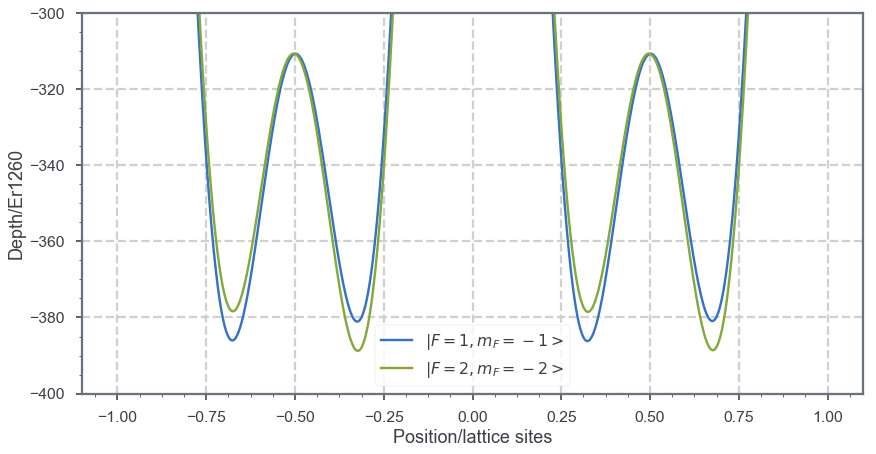

single well depth is  [22.65292872 22.60757284 22.65292872 22.60757284]  kHz
detuning is 0.0000000000 kHz


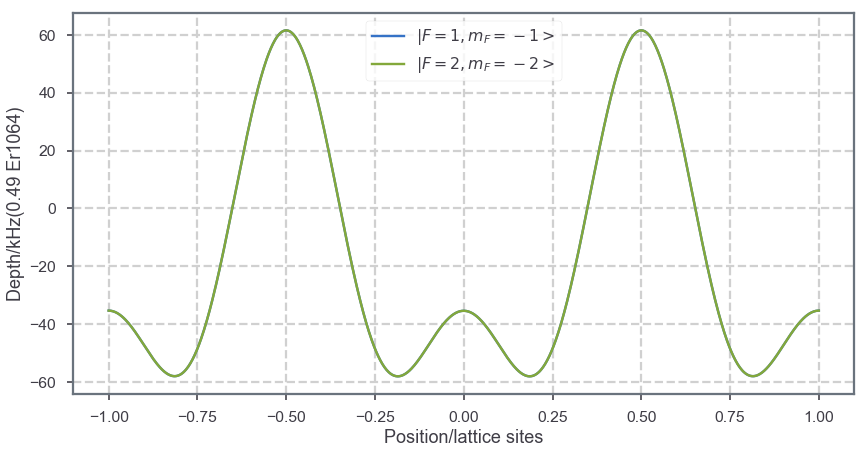

In [39]:
period=lambdalong/2/np.sin(kangle/2)
print('lattice constant is %0.2f nm'%(period/2*10**9))
xlist=np.linspace(-1*period,1*period,1000)
linearporangle1=90*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=200*10**-3/2,60*10**-6,15*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,0])*np.pi/180

potentialdown=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5,fi=0*np.pi/6) for xi in xlist])
potentialup=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5,fi=0*np.pi/6) for xi in xlist])
lenth=len(xlist)

downmin1=np.min(potentialdown[int(lenth/4):int(lenth/2)])
downmin2=np.min(potentialdown[0:int(lenth/4)])

upmin1=np.min(potentialup[int(lenth/4):int(lenth/2)])
upmin2=np.min(potentialup[0:int(lenth/4)])

high1=np.max(potentialup[int(lenth/8):int(3*lenth/8)])
high2=np.max(potentialup[int(3*lenth/8):int(5*lenth/8)])

detuning=-(downmin1-upmin1)+(downmin2-upmin2)
high=np.min([high1,high2])
depth=np.array([upmin1,upmin2,downmin1,downmin2])-downmin1
print(depth)

tll=np.array([downmin1+downmin2,downmin1+upmin2,downmin2+upmin1,upmin1+upmin2])
tll=tll-tll[1]
tll=tll*1/2/tll[2]
print(tll)

detuning=-(downmin1-upmin1)+(downmin2-upmin2)

print("detuning is %0.10f kHz"%detuning)

plt.figure(figsize=(14,7))
plt.xlabel('Position/lattice sites')
# plt.ylabel('Depth/kHz(%0.2f Er1064)'%(1/Er1064))
plt.ylabel('Depth/Er1260')
plt.ylim(-400,-300)
plt.minorticks_on()
plt.plot(xlist/period,potentialdown/Er1260,label=r'$|F=1,m_{F}=-1>$')
plt.plot(xlist/period,potentialup/Er1260,label=r'$|F=2,m_{F}=-2>$')
plt.legend(loc='best')

# linearporangle1=45*np.pi/180
# linearporangle2=0*np.pi/180
# plt.plot(xlist/lambdashort,\
#          [1.4*differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,lambdashort,mf=-1,gf=-0.5)\
#           +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
# plt.plot(xlist/lambdashort,\
#          [1.4*differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,lambdashort,mf=-2,gf=0.5)\
#           +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,lambdalong,mf=-2,gf=0.5) for xi in xlist])
plt.show()

period=lambdalong/2/np.sin(kangle/2)
xlist=np.linspace(-1*period,1*period,1000)
linearporangle1=0.0*np.pi/180
linearporangle2=0.0*np.pi/180
Pshort,w1short,w2short=71*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=30*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,0])*np.pi/180

potentialdown=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
potentialup=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in xlist])
lenth=len(xlist)

downmin1=np.min(potentialdown[int(lenth/4):int(lenth/2)])
downmin2=np.min(potentialdown[0:int(lenth/4)])

upmin1=np.min(potentialup[int(lenth/4):int(lenth/2)])
upmin2=np.min(potentialup[0:int(lenth/4)])

high1=np.max(potentialup[int(lenth/8):int(3*lenth/8)])
high2=np.max(potentialup[int(3*lenth/8):int(5*lenth/8)])

detuning=-(downmin1-upmin1)+(downmin2-upmin2)
high=np.min([high1,high2])
depth=high-np.array([upmin1,upmin2,downmin1,downmin2])
print('single well depth is ',depth,' kHz')

print("detuning is %0.10f kHz"%detuning)
plt.figure(figsize=(14,7))
plt.xlabel('Position/lattice sites')
plt.ylabel('Depth/kHz(%0.2f Er1064)'%(1/Er1064))
#plt.ylim(-600,-400)
plt.plot(xlist/period,potentialdown,label=r'$|F=1,m_{F}=-1>$')
plt.plot(xlist/period,potentialup,label=r'$|F=2,m_{F}=-2>$')
plt.legend(loc='best')
# linearporangle1=45*np.pi/180
# linearporangle2=0*np.pi/180
# plt.plot(xlist/lambdashort,\
#          [1.4*differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,lambdashort,mf=-1,gf=-0.5)\
#           +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
# plt.plot(xlist/lambdashort,\
#          [1.4*differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,lambdashort,mf=-2,gf=0.5)\
#           +differentPolarizeCompenont(klong,kangle,linearporangle1,quantumaxisangle,xi,0,0,lambdalong,mf=-2,gf=0.5) for xi in xlist])
plt.legend(loc='best')
plt.show()

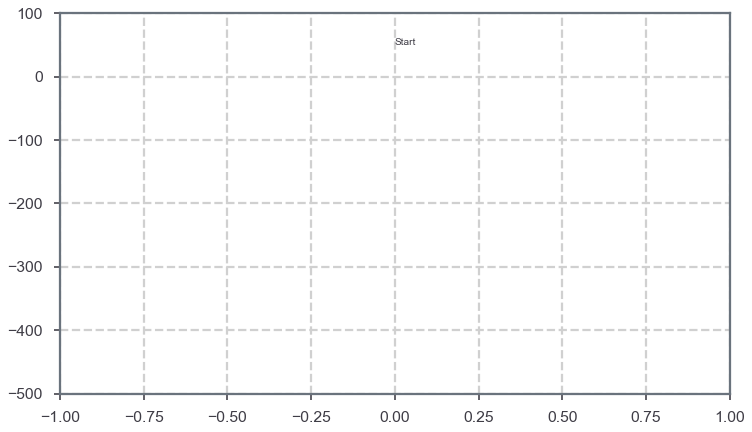

In [9]:
from matplotlib import animation   

xlist=np.linspace(-1*period,1*period,1000)
linearporangle1=50*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=600*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
#quantumaxisanglelist=np.array([0,-60])*np.pi/180
# first set up the figure, the axis, and the plot element we want to animate   
fig = plt.figure(figsize=(12,7)) 
ax1 = fig.add_subplot(1,1,1,xlim=(-1,1),ylim=(-500,100))
#ax2 = fig.add_subplot(2,1,2,xlim=(0, 2), ylim=(-4, 4))
line1, = ax1.plot([], [], lw=2)  
line2, = ax1.plot([], [], lw=2)  
line3= ax1.text(0,50,'',fontsize=10)  

def init():  
    line1.set_data([], [])  
    line2.set_data([], [])  
    line3.set_text('Start')
    return line1,line2,line3

# animation function.  this is called sequentially   
def animate(quantumaxisangle):

    x = xlist
    potentialdown=[differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,quantumaxisangle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,quantumaxisangle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in x]

    line1.set_data(x/period, potentialdown)  


    x2 = xlist
    potentialup=[differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,quantumaxisangle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
          +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,quantumaxisangle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in x2]

    line2.set_data(x2/period, potentialup)   
    #print(quantumaxisangle)
    line3.set_text("the quantum axis angle is %0.1f degree"%(quantumaxisangle))
    return line1,line2,line3

anim1=animation.FuncAnimation(fig, animate, init_func=init,  frames=np.linspace(-90,0,91), interval=40,blit=False)  
#plt.show()

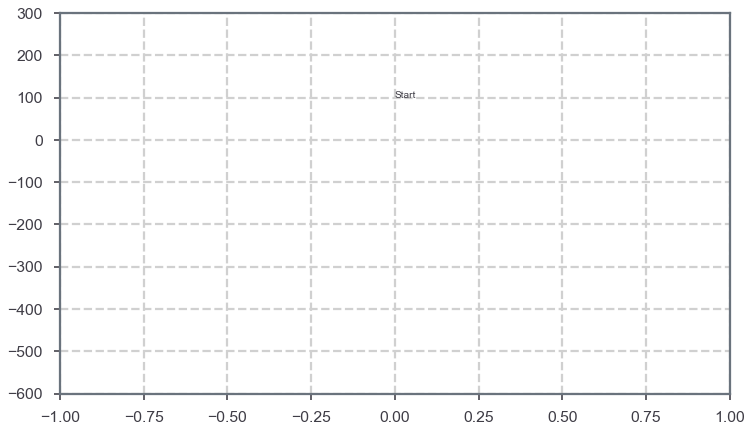

In [13]:
from matplotlib import animation   

xlist=np.linspace(-1*period,1*period,1000)
linearporangle1=50*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=600*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,0])*np.pi/180
# first set up the figure, the axis, and the plot element we want to animate   
fig = plt.figure(figsize=(12,7)) 
ax1 = fig.add_subplot(1,1,1,xlim=(-1,1),ylim=(-600,300))
#ax2 = fig.add_subplot(2,1,2,xlim=(0, 2), ylim=(-4, 4))
line1, = ax1.plot([], [], lw=2)  
line2, = ax1.plot([], [], lw=2)  
line3= ax1.text(0,100,'',fontsize=10)  

def init():  
    line1.set_data([], [])  
    line2.set_data([], [])  
    line3.set_text('Start')
    return line1,line2,line3

# animation function.  this is called sequentially   
def animate(polarangle):
    line3.set_text("the polarization angle is %0.1f degree"%(polarangle))
    polarangle=polarangle*np.pi/180
    
    x = xlist
    potentialdown=[differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
          +differentPolarizeCompenont(klong,kangle,polarangle,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in x]

    line1.set_data(x/period, potentialdown)  


    x2 = xlist
    potentialup=[differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
          +differentPolarizeCompenont(klong,kangle,polarangle,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in x2]

    line2.set_data(x2/period, potentialup)   
    #print(quantumaxisangle)
    
    return line1,line2,line3

anim1=animation.FuncAnimation(fig, animate, init_func=init,  frames=np.linspace(-90,0,91), interval=40,blit=False)  
#plt.show()

In [14]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
anim1.save('im2.mp4', writer=writer)

In [13]:
xlist=np.linspace(-1*period,0,500)
linearporangle1=40*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=600*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,-60])*np.pi/180
quantumaxisanglelist=np.linspace(-90,0,100)

detuninglist=[]

for angle in quantumaxisanglelist:
    potentialdown=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,angle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
              +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,angle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
    potentialup=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,angle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
              +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,angle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in xlist])
    lenth=len(xlist)

    downmin1=np.min(potentialdown[int(lenth/2):int(lenth)])
    downmin2=np.min(potentialdown[0:int(lenth/2)])

    upmin1=np.min(potentialup[int(lenth/2):int(lenth)])
    upmin2=np.min(potentialup[0:int(lenth/2)])

    detuning=-(downmin1-upmin1)+(downmin2-upmin2)
    detuninglist.append(detuning)

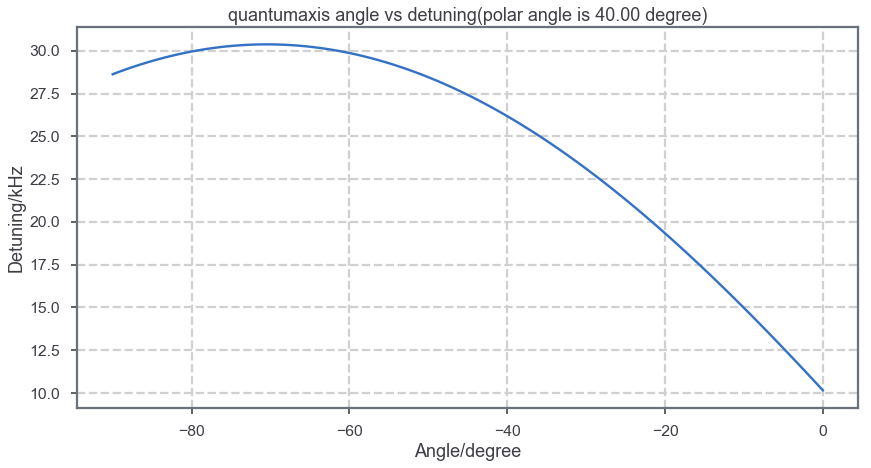

In [14]:
plt.figure(figsize=(14,7))    
plt.title("quantumaxis angle vs detuning(polar angle is %0.2f degree)"%(linearporangle1*180/np.pi))
plt.ylabel("Detuning/kHz")
plt.xlabel("Angle/degree")
plt.plot(quantumaxisanglelist,detuninglist)

In [17]:
xlist=np.linspace(-1*period,0*period,500)
linearporangle1=90*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=600*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,-60])*np.pi/180
quantumaxisanglelist=np.linspace(-90,0,100)

detuninglist=[]

for angle in quantumaxisanglelist:
    potentialdown=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,angle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
              +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,angle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
    potentialup=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,np.array([0,angle])*np.pi/180,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
              +differentPolarizeCompenont(klong,kangle,linearporangle1,np.array([0,angle])*np.pi/180,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in xlist])
    lenth=len(xlist)

    downmin1=np.min(potentialdown[int(lenth/2):int(lenth)])
    downmin2=np.min(potentialdown[0:int(lenth/2)])

    upmin1=np.min(potentialup[int(lenth/2):int(lenth)])
    upmin2=np.min(potentialup[0:int(lenth/2)])

    detuning=-(downmin1-upmin1)+(downmin2-upmin2)
    detuninglist.append(detuning)

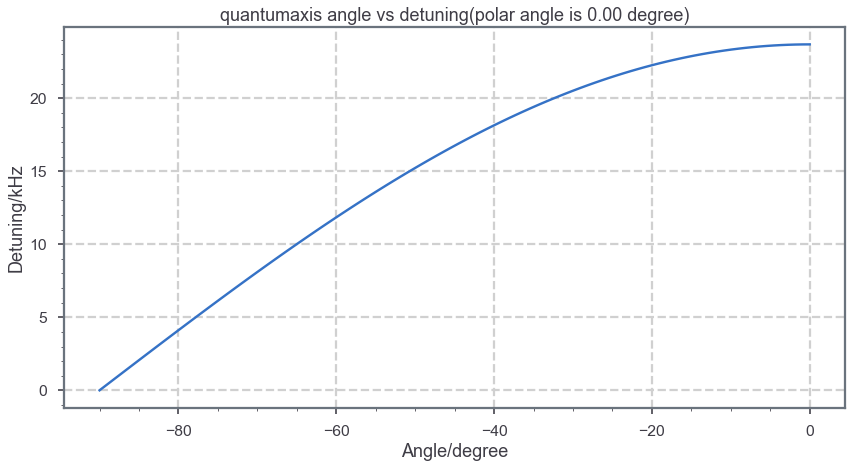

In [32]:
plt.figure(figsize=(14,7))    
plt.minorticks_on()
plt.title("quantumaxis angle vs detuning(polar angle is %0.2f degree)"%(linearporangle1*180/np.pi))
plt.ylabel("Detuning/kHz")
plt.xlabel("Angle/degree")
plt.plot(quantumaxisanglelist,detuninglist)

In [35]:
xlist=np.linspace(-1*period,0*period,500)
linearporangle1=90*np.pi/180
linearporangle2=0*np.pi/180
Pshort,w1short,w2short=600*10**-3,60*10**-6,60*10**-6
Plong,w1long,w2long=300*10**-3,50*10**-6,50*10**-6
quantumaxisangle=np.array([0,0])*np.pi/180
polaranglelist=np.linspace(0,90,100)

detuninglist=[]

for angle in polaranglelist:
    potentialdown=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-1,gf=-0.5)\
              +differentPolarizeCompenont(klong,kangle,angle*np.pi/180,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-1,gf=-0.5) for xi in xlist])
    potentialup=np.array([differentPolarizeCompenont(kshort,kangle,linearporangle2,quantumaxisangle,xi,0,0,Pshort,w1short,w2short,lambdashort,mf=-2,gf=0.5)\
              +differentPolarizeCompenont(klong,kangle,angle*np.pi/180,quantumaxisangle,xi,0,0,Plong,w1long,w2long,lambdalong,mf=-2,gf=0.5) for xi in xlist])
    lenth=len(xlist)

    downmin1=np.min(potentialdown[int(lenth/2):int(lenth)])
    downmin2=np.min(potentialdown[0:int(lenth/2)])

    upmin1=np.min(potentialup[int(lenth/2):int(lenth)])
    upmin2=np.min(potentialup[0:int(lenth/2)])

    detuning=-(downmin1-upmin1)+(downmin2-upmin2)
    detuninglist.append(detuning)

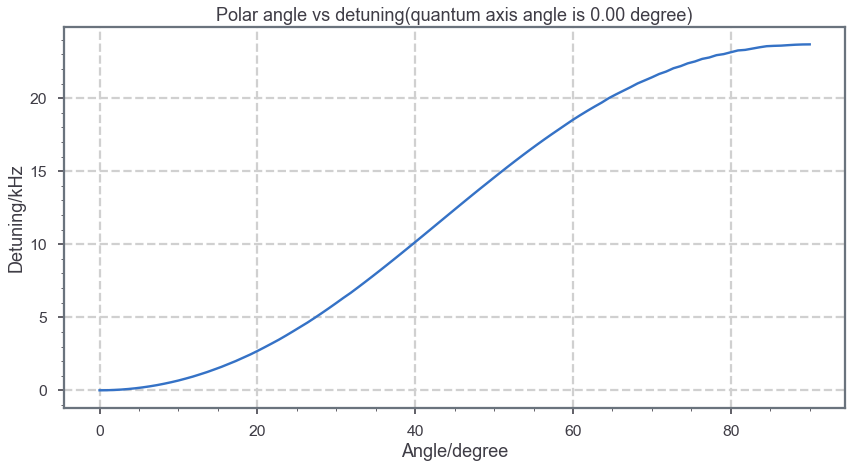

In [36]:
plt.figure(figsize=(14,7))    
plt.minorticks_on()
plt.title("Polar angle vs detuning(quantum axis angle is %0.2f degree)"%(quantumaxisangle[1]*180/np.pi))
plt.ylabel("Detuning/kHz")
plt.xlabel("Angle/degree")
plt.plot(polaranglelist,detuninglist)

In [29]:
potfactor(lamda,polar=1,mf=-1,gf=-0.5),potfactor(lamda,polar=0,mf=-1,gf=-0.5),potfactor(lamda,polar=-1,mf=-1,gf=-0.5)

(-0.0031377767393537858, -0.0031731616535362406, -0.0032085465677186937)